In [97]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import warnings

# !pip install statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error as mae
# !pip install arch
from arch.unitroot import ADF, VarianceRatio
warnings.filterwarnings("ignore")

#### QUESTION 1

In [98]:
# READING IN THE csv - Intraday on-shore wind power generation measured every hour for one year
windPower = pd.read_csv("WindGeneration.csv", parse_dates = True)

# SEE IF THERE ARE NANS and EMPTY FIELDS
windPower.info()

# CHECK THE FIRST 5 ROWS OF THE DATAFRAME
windPower.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Time             8760 non-null   int64  
 2   Wind Generation  8759 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 205.4+ KB


,Date,Time,Wind Generation
0,01/01/2014,1,1190.1
1,01/01/2014,2,1186.6
2,01/01/2014,3,1174.3
3,01/01/2014,4,1146.7
4,01/01/2014,5,1156.8


In [99]:
# CHANGING DATE COLUMN TO DATETIME FORMAT
dateFormat = "%d/%m/%Y"
windPower["Date"] = pd.to_datetime(windPower["Date"], format = dateFormat)

# CHANGING TIME COLUMN TO TIMEDELTA FORMAT
timeDelta = pd.to_timedelta(windPower["Time"], unit="hours")

# GENERATE TIMESTAMPS FROM DATETIME BY ADDING THE TIME TO DATE
windPower["Date"] = windPower["Date"] + timeDelta

# FILLING NAN VALUES IN THE DATAFRAME - USING LINEAR INTERPOLATION
windPower = windPower.interpolate(method = 'pad')
windPower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Time             8760 non-null   int64         
 2   Wind Generation  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 205.4 KB


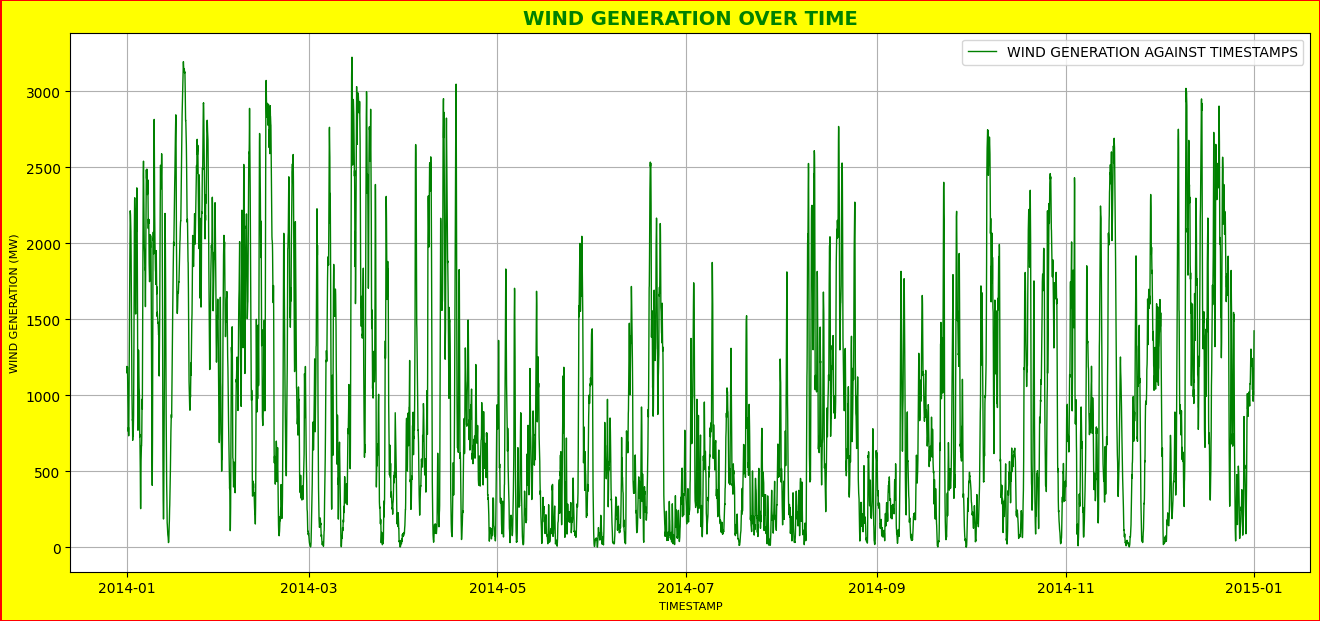

In [100]:
# PRODUCING A GRAPHIC SHOWING THE TIME SERIES OF THE WIND GENERATION OVER TIME
windDate = windPower["Date"]
windGen = windPower["Wind Generation"]

# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize = (16, 7), edgecolor = "red", facecolor = "yellow", linewidth = 1)
plt.xlabel("TIMESTAMP", color = "black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color = "black", fontsize = 8)
plt.title("WIND GENERATION OVER TIME", color = "green", fontsize = 14, fontweight = "bold")

# PLOTTING THE GRAPH OF WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windDate, windGen, label="WIND GENERATION AGAINST TIMESTAMPS", color = "green", linewidth = 1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [101]:
# SETTING THE DATE AS THE INDEX
windPower = windPower.set_index("Date")

# DROP THE Time COLUMN AS IT IS NO LONGER NEEDED
windPower = windPower.drop("Time", axis=1)

# MAKING A DAILY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPowerDaily = windPower.resample("D").mean()
windPowerDaily.tail(2)


,Wind Generation
Date,
2014-12-31,1155.733333
2015-01-01,1424.800000


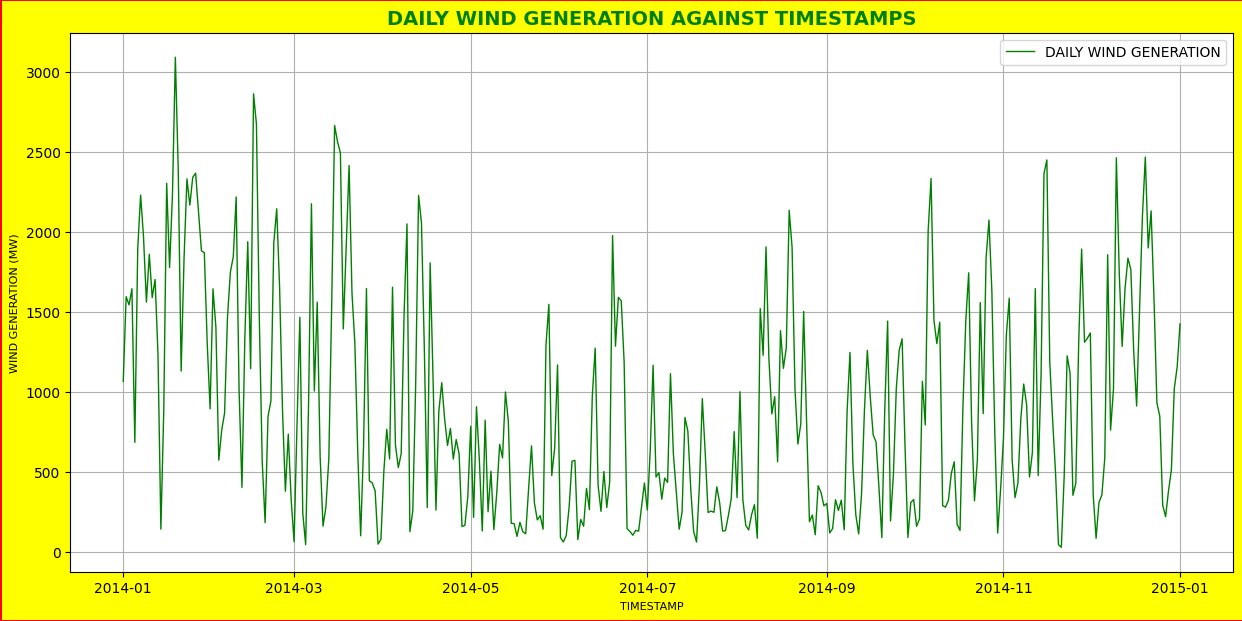

In [102]:
# PRODUCING A GRAPHIC SHOWING DAILY TIME SERIES OF THE WIND GENERATION
windDaily = windPowerDaily.index
windGenD = windPowerDaily["Wind Generation"]

# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize=8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize=8)
plt.title("DAILY WIND GENERATION AGAINST TIMESTAMPS", color="green", fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF DAILY WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windDaily, windGenD, label="DAILY WIND GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [103]:
# MAKING A WEEKLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPowerWeekly = windPower.resample("W").mean()
windPowerWeekly.tail()

,Wind Generation
Date,
2014-12-07,701.604762
2014-12-14,1534.852381
2014-12-21,1699.818452
2014-12-28,911.125595
2015-01-04,901.858904


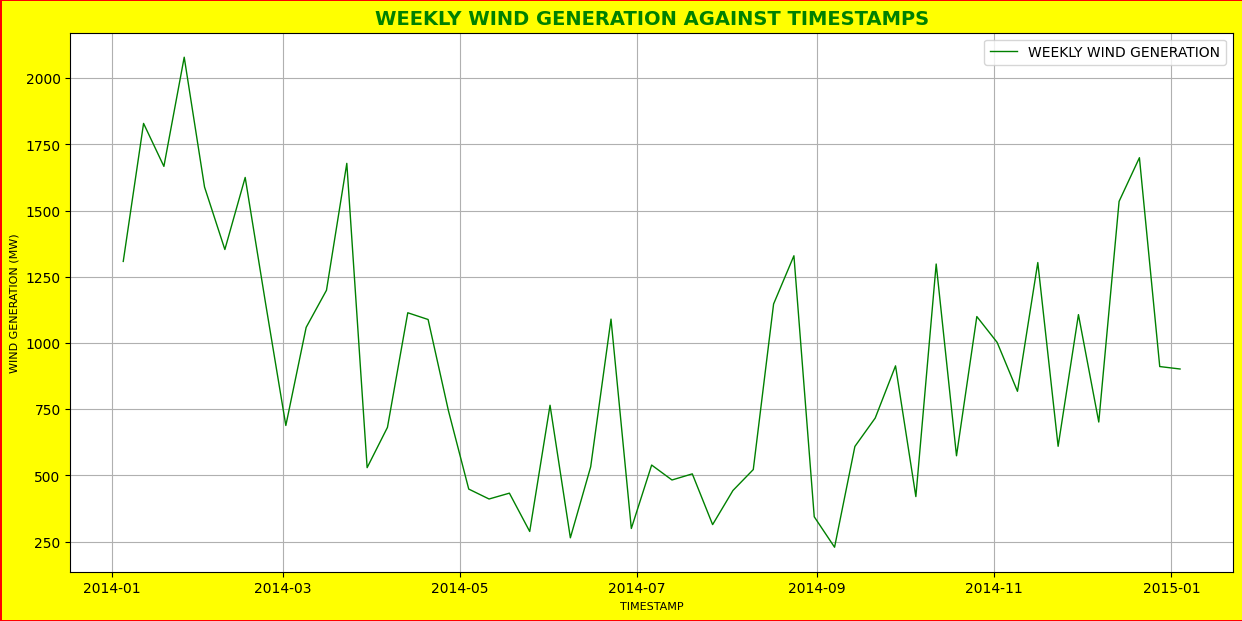

In [104]:
# PRODUCING A GRAPHIC SHOWING WEEKLY TIME SERIES OF THE WIND GENERATION
windWeekly = windPowerWeekly.index
windGenW = windPowerWeekly["Wind Generation"]

# PLOTTING THE GRAPH OF WEEKLY WIND GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize=8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize = 8)
plt.title("WEEKLY WIND GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF WEEKLY WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windWeekly, windGenW, label="WEEKLY WIND GENERATION",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [105]:
# MAKING A MONTHLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPowerMonthly = windPower.resample("M").mean()
windPowerMonthly.tail()

,Wind Generation
Date,
2014-09-30,589.202222
2014-10-31,913.152151
2014-11-30,964.340972
2014-12-31,1181.148253
2015-01-31,1424.800000


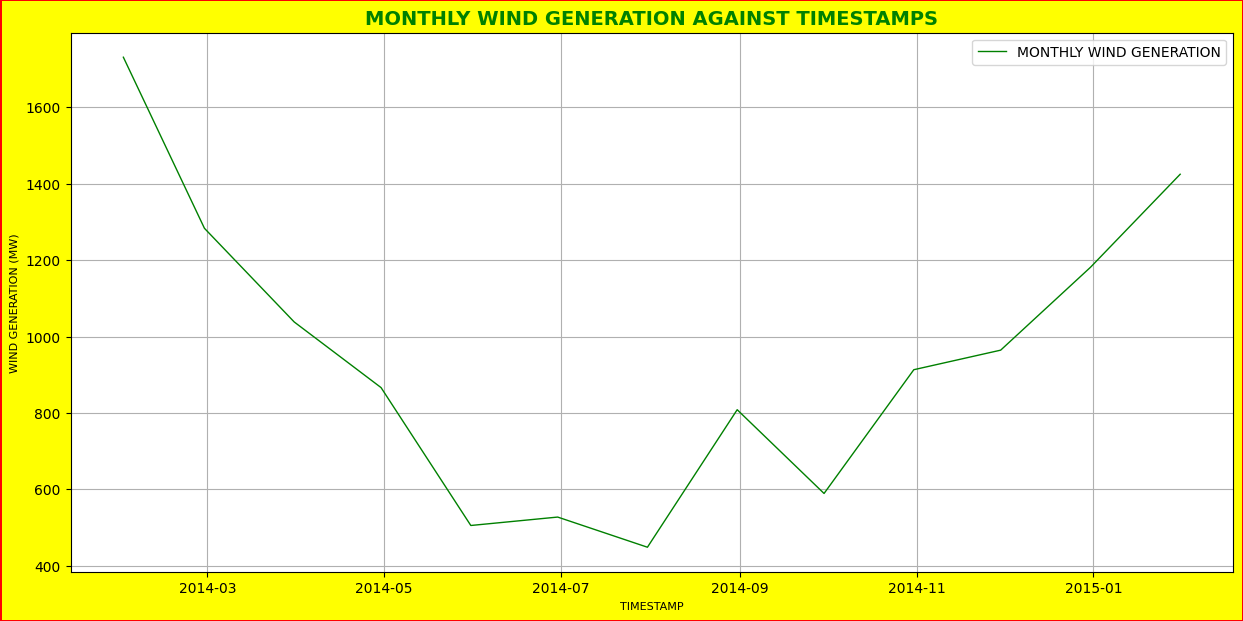

In [106]:
# PRODUCING A GRAPHIC SHOWING MONTHLY TIME SERIES OF THE WIND GENERATION
windMonthly = windPowerMonthly.index
windGenM = windPowerMonthly["Wind Generation"]

# PLOTTING THE GRAPH OF MONTHLY WIND GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize=8)
plt.title("MONTHLY WIND GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF MONTHLY WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windMonthly, windGenM, label="MONTHLY WIND GENERATION",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()


In [107]:
# MAKING A QUARTELY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPowerQuartely = windPower.resample("Q").mean()
windPowerQuartely

,Wind Generation
Date,
2014-03-31,1352.930107
2014-06-30,631.641255
2014-09-30,615.661051
2014-12-31,1020.147192
2015-03-31,1424.800000


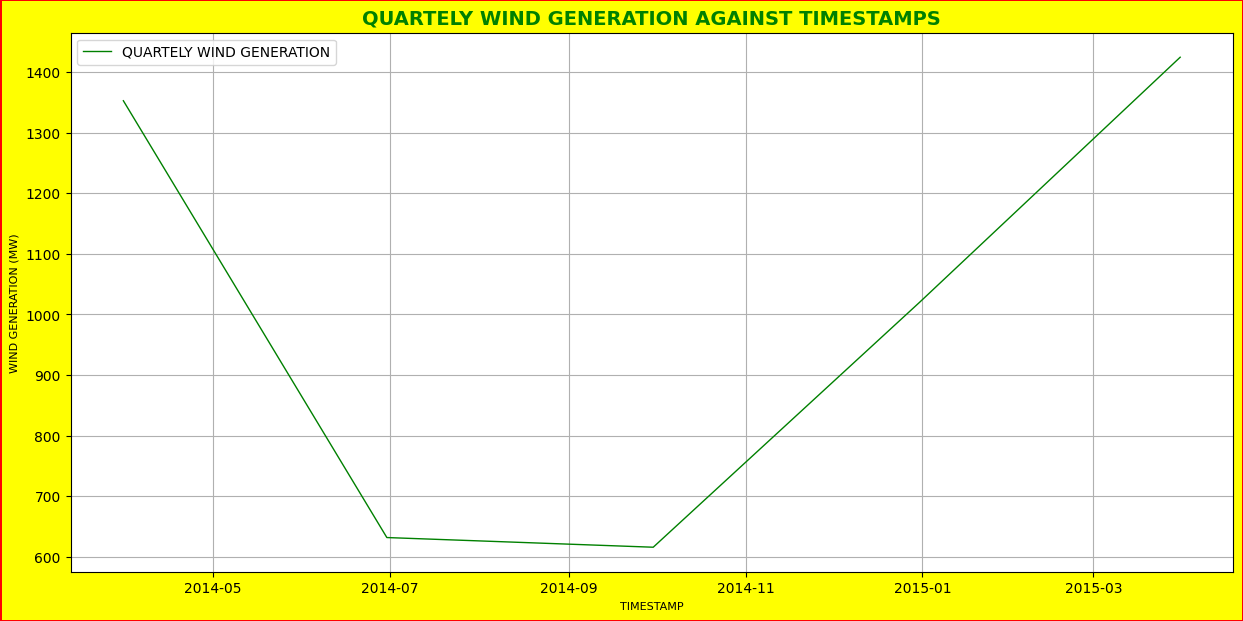

In [108]:
# PRODUCING A GRAPHIC SHOWING QUARTELY TIME SERIES OF THE WIND GENERATION
windQuartely = windPowerQuartely.index
windGenQ = windPowerQuartely["Wind Generation"]

# PLOTTING QUARTELY TIME SERIES OF THE WIND GENERATION
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize=8)
plt.title("QUARTELY WIND GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF QUARTELY WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windQuartely, windGenQ, label="QUARTELY WIND GENERATION",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 2

In [109]:
# FINDING MAXIMUM GENERATION OF WIND POWER
maxGeneration = windPower.max()
maxGeneration

Wind Generation    3225.4
dtype: float64

In [110]:
# GENERATING THE CHANGE IN WIND GENERATION OVER TIME - FORMULA: r(t) = 100 * ([p(t)/p(t-1)] - 1)/max(p)
# FINDING THE CHANGES IN WIND GENERATION OVER TIME
i = 1
windPowerChange = []  # LIST TO STORE THE CHANGES IN WIND GENERATION OVER TIME
genWind = windPower["Wind Generation"]

# LOOPING THROUGH THE WIND GENERATION DATA TO FIND THE CHANGES IN WIND GENERATION OVER TIME
while (i < len(genWind)):
    # CALCULATING THE CHANGE IN WIND GENERATION OVER TIME AND APPENDING IT TO THE LIST
    windPowerChange.append(100 *
                           ((((genWind)[i]-(genWind)[i-1])-1) / maxGeneration))
    i += 1


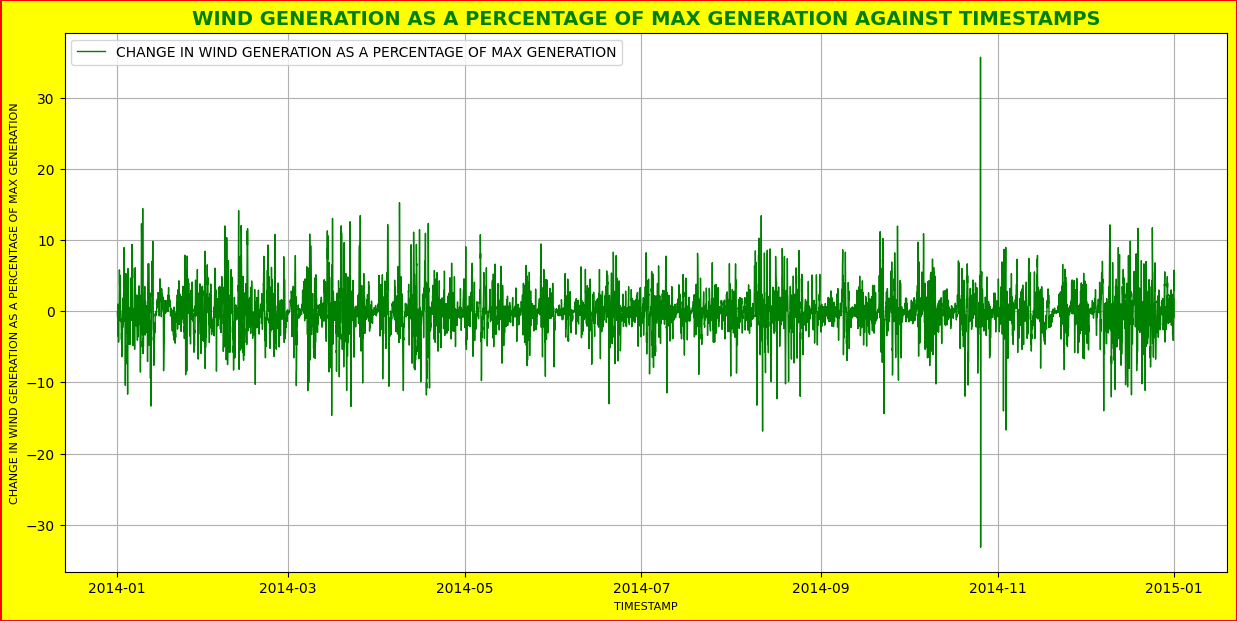

In [111]:
# PRODUCING A GRAPHIC SHOWING CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION", color="black", fontsize = 8)
plt.title("WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPower.index[1:], windPowerChange, label="CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [112]:
# DROP THE FIRST ROW FROM THE DATAFRAME
windPerc = windPower.drop(windPower.index[0])

# ADD THE WIND GENERATION CHANGE COLUMN TO THE DATAFRAME
windPerc['Change in Wind Generation'] = windPowerChange

# MAKING A DAILY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPercDaily = windPerc.astype(float).resample("D").mean()
windPercDaily.head(4)

,Wind Generation,Change in Wind Generation
Date,,
2014-01-01,1059.186364,0.568781
2014-01-02,1594.850000,-1.207731
2014-01-03,1543.333333,1.186158
2014-01-04,1644.262500,-0.642944


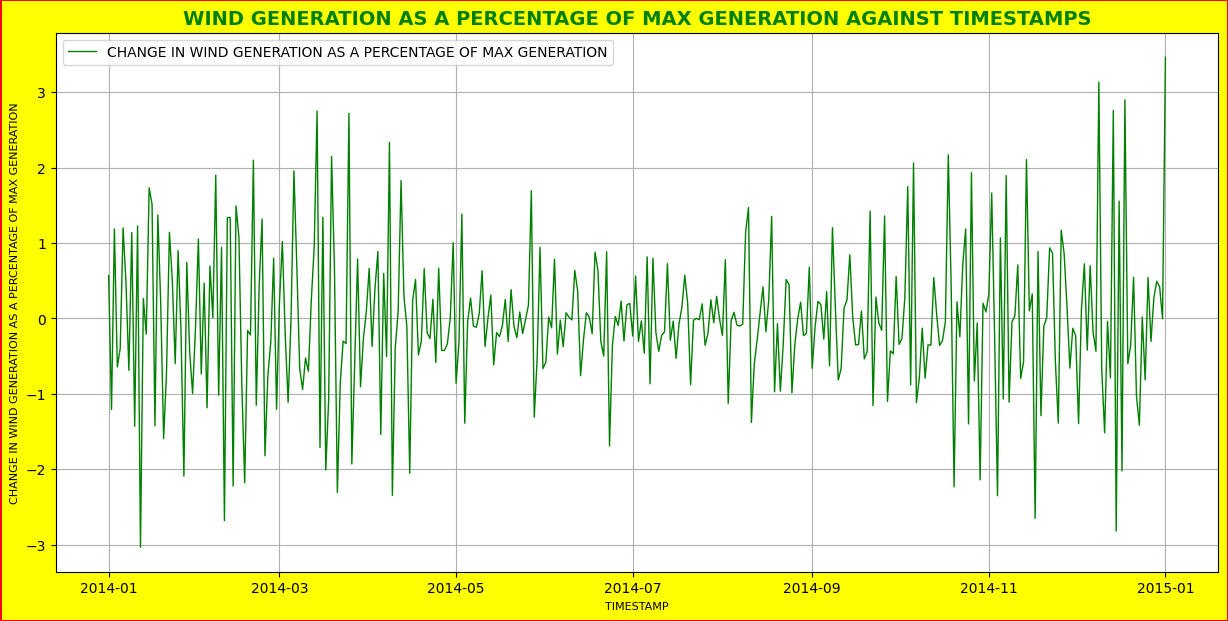

In [113]:
# PRODUCING A GRAPHIC SHOWING CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION", color="black", fontsize = 8)
plt.title("WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPercDaily.index, windPercDaily['Change in Wind Generation'], label="CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

            Wind Generation  Change in Wind Generation
Date                                                  
2014-12-14      1534.852381                   0.347484
2014-12-21      1699.818452                  -0.113921
2014-12-28       911.125595                  -0.390262
2015-01-04       901.858904                   0.345205


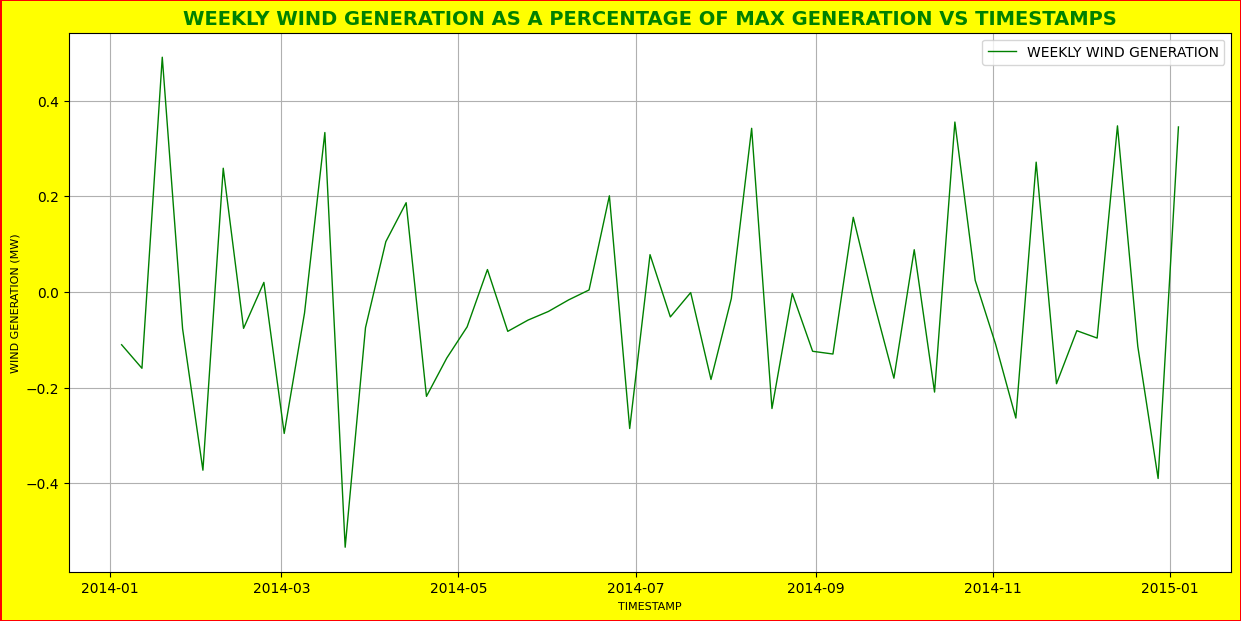

In [114]:
# MAKING A WEEKLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPercWeekly = windPerc.astype(float).resample("W").mean()
print(windPercWeekly.tail(4))

# PRODUCING A GRAPHIC SHOWING WEEKLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize = 8)
plt.title("WEEKLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION VS TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF WEEKLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPercWeekly.index, windPercWeekly['Change in Wind Generation'], label="WEEKLY WIND GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()

            Wind Generation  Change in Wind Generation
Date                                                  
2014-10-31       913.152151                  -0.032900
2014-11-30       964.340972                   0.004151
2014-12-31      1181.148253                  -0.027954
2015-01-31      1424.800000                   3.463136


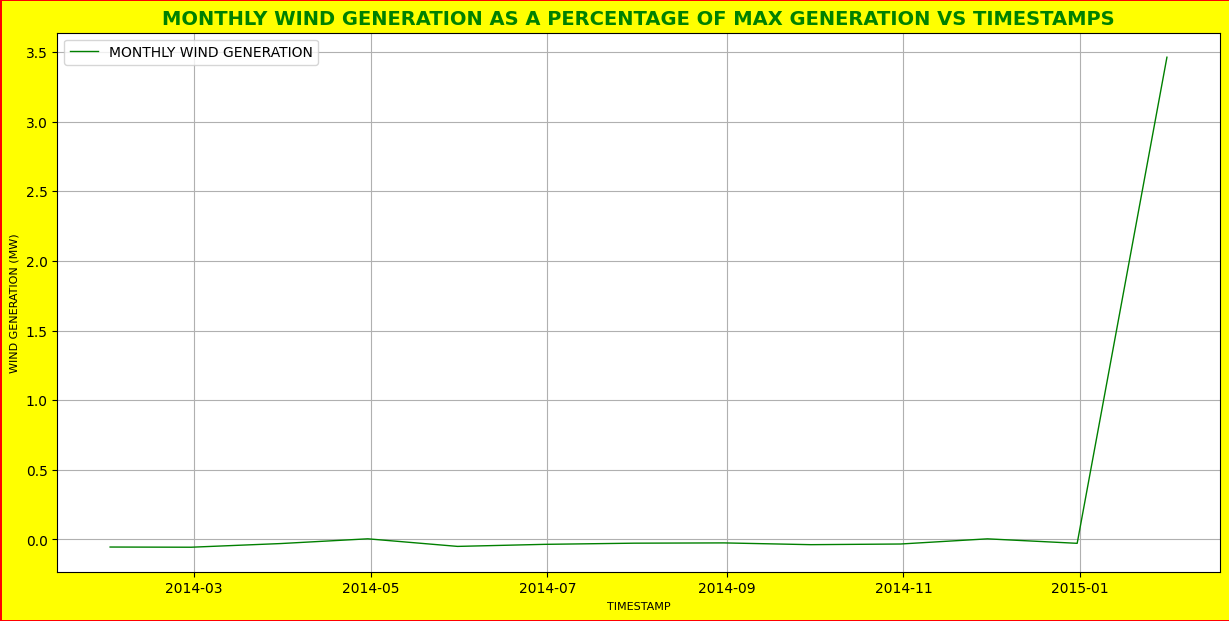

In [115]:
# MAKING A MONTHLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPercMonthly = windPerc.astype(float).resample("M").mean()
print(windPercMonthly.tail(4))

# PRODUCING A GRAPHIC SHOWING MONTHLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize = 8)
plt.title("MONTHLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION VS TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF MONTHLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPercMonthly.index, windPercMonthly['Change in Wind Generation'], label="MONTHLY WIND GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()


            Wind Generation  Change in Wind Generation
Date                                                  
2014-03-31      1353.005561                  -0.046411
2014-06-30       631.641255                  -0.027269
2014-09-30       615.661051                  -0.029779
2014-12-31      1020.147192                  -0.019151
2015-03-31      1424.800000                   3.463136


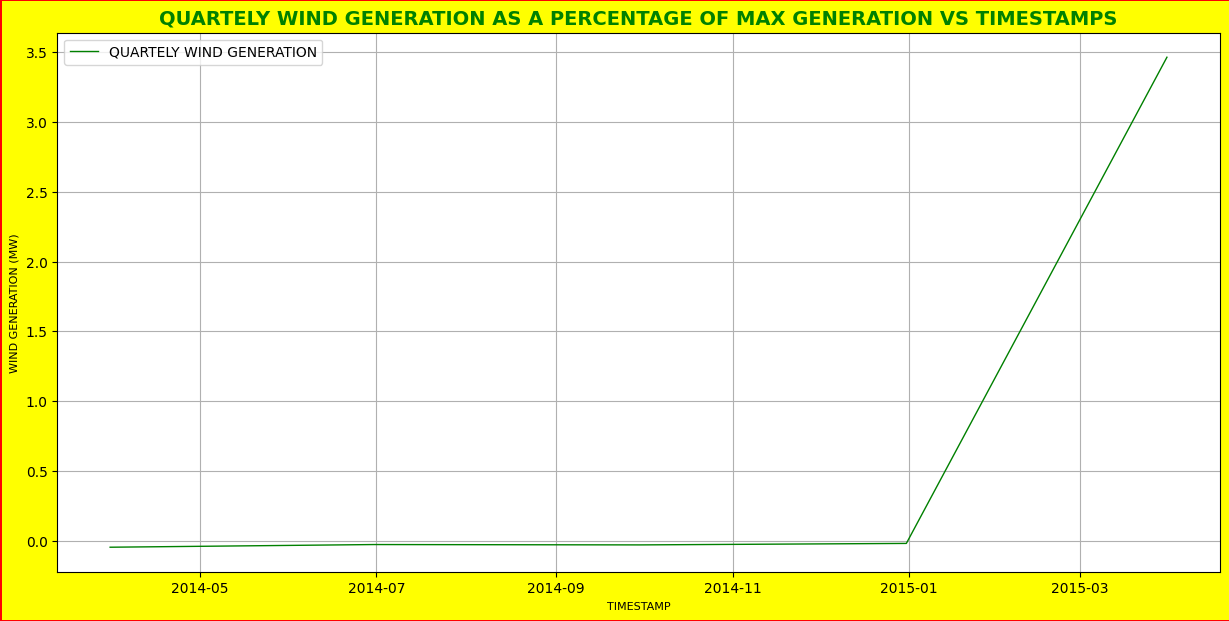

In [116]:
# MAKING A MONTHLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPercQuartely = windPerc.astype(float).resample("Q").mean()
print(windPercQuartely.tail())

# PRODUCING A GRAPHIC SHOWING QUARTELY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize = 8)
plt.title("QUARTELY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION VS TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF QUARTELY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPercQuartely.index, windPercQuartely['Change in Wind Generation'], label="QUARTELY WIND GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 3

In [117]:
# windPerc IS USED SINCE ITS "Change in Wind Generation" COLUMN IS THE RESULTS OF THE FOLLOWING FORMULA: 
# r(t) = 100 * ([p(t)/p(t-1)] - 1)/max(p)
# RAMP FUNCTION IS DEFINED AS: r(t,d) = 100 * [x  (t + d) - x(t) ] / max(x) WHERE d = 1
# r(t) = 100 * [x(t+1) - x(t)] / max(x) i.e., EQUAL TO r(t) = 100 * ([p(t)/p(t-1)] - 1)/max(p)

# CONVERT windPerc TO A NUMERIC DATA TYPE
windNum = windPerc.astype(float)
windNum.head(4)


,Wind Generation,Change in Wind Generation
Date,,
2014-01-01 02:00:00,1186.6,-0.139518
2014-01-01 03:00:00,1174.3,-0.412352
2014-01-01 04:00:00,1146.7,-0.886712
2014-01-01 05:00:00,1156.8,0.282136


In [118]:
# RAMPS - POSITIVE - SORTED BY CHANGE IN WIND GENERATION
rampsNumPos = windNum[windNum["Change in Wind Generation"] > 0]

# SORTING THE DATAFRAME BY THE CHANGE IN WIND GENERATION
sortRampsNumPos = rampsNumPos.sort_values(by="Change in Wind Generation", ascending=True)

sortRampsNumPos.head(4)

,Wind Generation,Change in Wind Generation
Date,,
2014-03-17 06:00:00,2926.0,0.003100
2014-05-09 10:00:00,18.7,0.003100
2014-03-13 00:00:00,319.5,0.003100
2014-09-19 07:00:00,501.5,0.006201


In [119]:
# RAMPS - NEGATIVE - SORTED BY CHANGE IN WIND GENERATION
rampsNumNeg = windNum[windNum["Change in Wind Generation"] < 0]

# ADDING ABSOLUTE VALUE OF CHANGE IN WIND GENERATION TO THE NEGATIVE DATAFRAME
rampsNumNeg["Change in Wind Generation (abs)"] = rampsNumNeg["Change in Wind Generation"].abs(
)

# SORTING THE RAMPERS BY CHANGE IN WIND GENERATION (ABSOLUTE VALUE)
sortRampsNumNeg = rampsNumNeg.sort_values(
    by="Change in Wind Generation (abs)", ascending=True)

sortRampsNumNeg.head(4)

,Wind Generation,Change in Wind Generation,Change in Wind Generation (abs)
Date,,,
2014-12-06 16:00:00,345.6,-0.0031,0.0031
2014-07-24 01:00:00,195.3,-0.0031,0.0031
2014-12-02 20:00:00,33.6,-0.0031,0.0031
2014-11-20 20:00:00,44.8,-0.0031,0.0031


In [120]:
# FINDING POSITIVE Y VALUES
YPositive = (np.arange(len(sortRampsNumPos['Change in Wind Generation']))) / (
    len(sortRampsNumPos['Change in Wind Generation'])+1)
print("Sample positive y\n", YPositive)

# NEGATIVE Y VALUES
YNegative = (np.arange(len(sortRampsNumNeg['Change in Wind Generation (abs)'])))/(
    len(sortRampsNumNeg['Change in Wind Generation (abs)'])+1)
print("Sample negative y\n", YNegative)


Sample positive y
 [0.00000000e+00 2.32504069e-04 4.65008138e-04 ... 9.99069984e-01
 9.99302488e-01 9.99534992e-01]
Sample negative y
 [0.00000000e+00 2.24416517e-04 4.48833034e-04 ... 9.99102334e-01
 9.99326750e-01 9.99551167e-01]


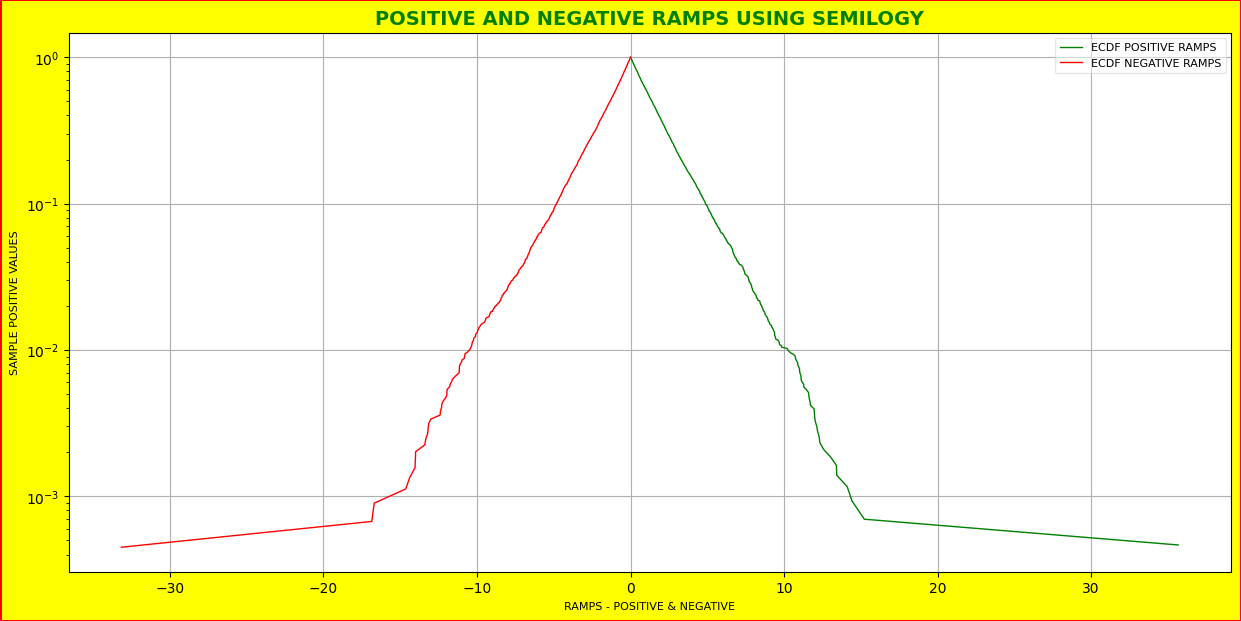

In [121]:
# PLOTTING THE EMPIRICAL CDF FOR BOTH POSITIVE AND NEGATIVE RAMPS USING SEMILOGY PLOT
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("RAMPS - POSITIVE & NEGATIVE", color="black", fontsize=8)
plt.ylabel("SAMPLE POSITIVE VALUES", color="black", fontsize=8)
plt.title("POSITIVE AND NEGATIVE RAMPS USING SEMILOGY", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING ECDF FOR POSITIVE RAMPS
plt.semilogy(sortRampsNumPos["Change in Wind Generation"], 1 -
             YPositive, label="ECDF POSITIVE RAMPS", color="green", linewidth=1)

# PLOTTING ECDF FOR NEGATIVE RAMPS
plt.semilogy(-sortRampsNumNeg["Change in Wind Generation (abs)"],
             1-YNegative, label="ECDF NEGATIVE RAMPS", color="red", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right", fontsize=8, framealpha=0.5)
plt.grid()
plt.show()

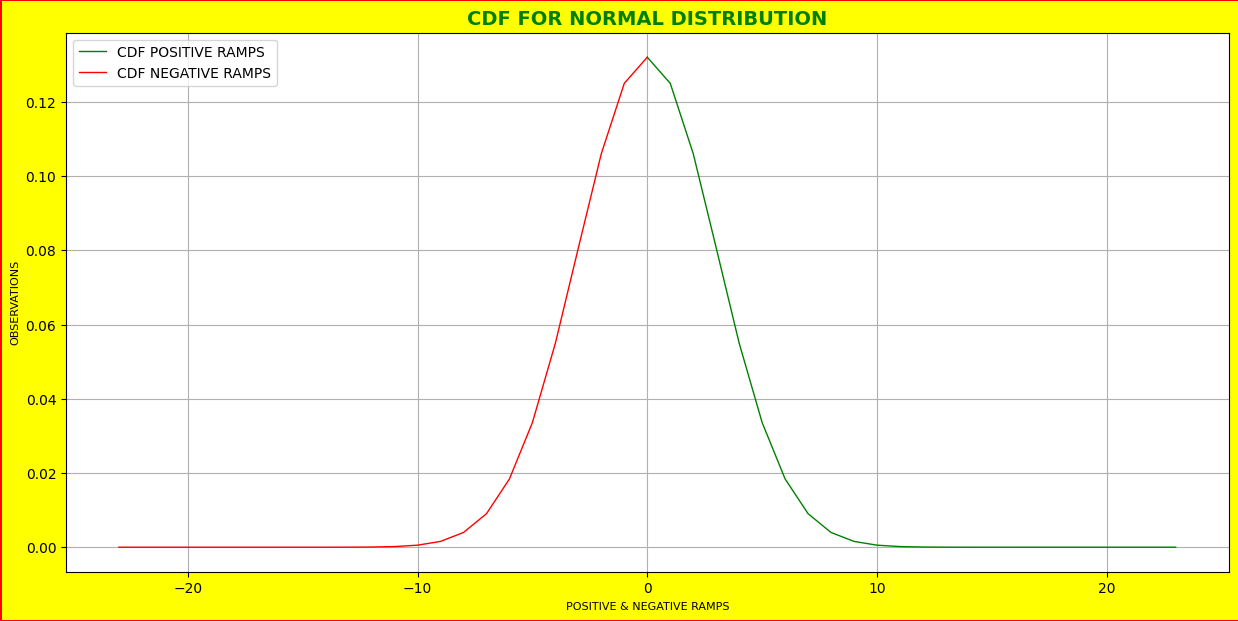

In [122]:
# CDF FOR NORMAL DISTRIBUTION WITH MEAN ZERO AND STANDARD DEVIATION FROM THE SAMPLE
xAxisPos = np.arange(0, 24)
xAxisNeg = np.negative(xAxisPos)
stDeviation = statistics.stdev(windNum["Change in Wind Generation"])

# PLOTTING THE CDF GRAPH WITH POSITIVE AND NEGATIVE RAMPS - SEMILOGY
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.title('CDF FOR NORMAL DISTRIBUTION', color="green",
          fontsize=14, fontweight="bold")
plt.xlabel('POSITIVE & NEGATIVE RAMPS', color="black", fontsize=8)
plt.ylabel('OBSERVATIONS', color="black", fontsize=8)

# PLOTTING NORMAL DISTRIBUTION CDF FOR POSITIVE AND NEGATIVE RAMPS
plt.plot(xAxisPos, stats.norm.pdf(xAxisPos, 0, stDeviation),
         label="CDF POSITIVE RAMPS", color="green", linewidth=1)
plt.plot(xAxisNeg, stats.norm.pdf(xAxisPos, 0, stDeviation),
         label="CDF NEGATIVE RAMPS", color="red", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()


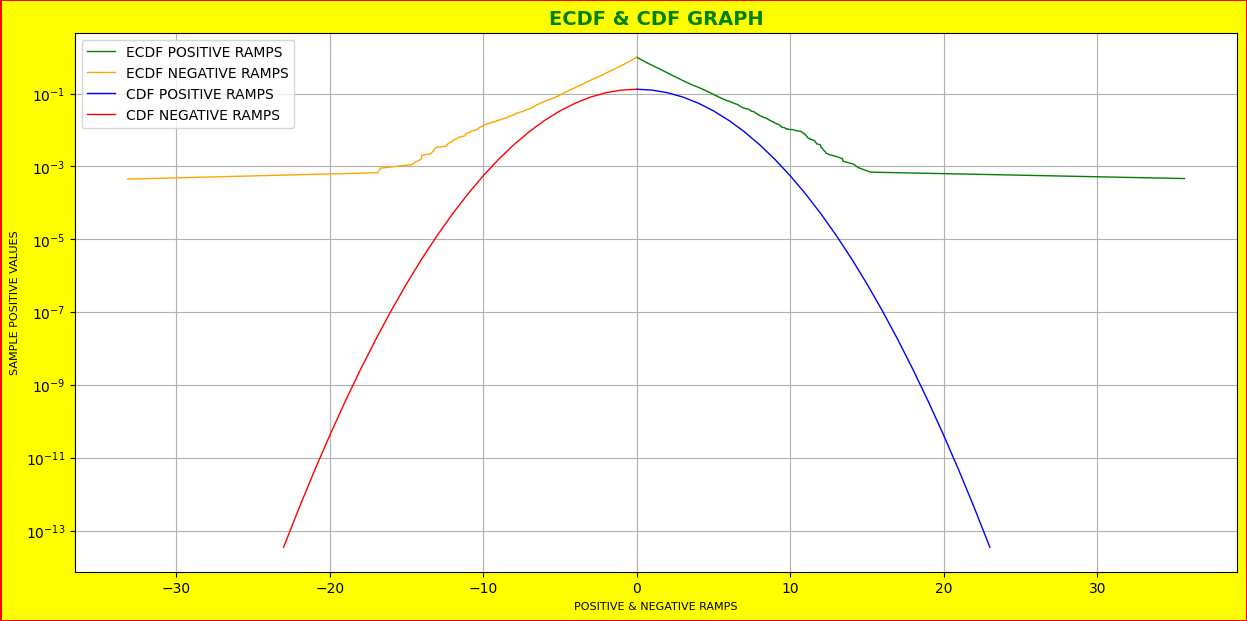

In [123]:
# ECDF & CDF ON THE SAME GRAPH - POSITIVE AND NEGATIVE RAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.title('ECDF & CDF GRAPH', color="green", fontsize=14, fontweight="bold")
plt.xlabel('POSITIVE & NEGATIVE RAMPS', color="black", fontsize=8)
plt.ylabel('SAMPLE POSITIVE VALUES', color="black", fontsize=8)

# PLOTTING THE POSITIVE RAMPS AND NEGATIVE RAMPS ON THE SAME GRAPH WITH SEMILOGY AND CDF
plt.semilogy(sortRampsNumPos["Change in Wind Generation"], 1 -
             YPositive, label="ECDF POSITIVE RAMPS", color="green", linewidth=1)
plt.semilogy(-sortRampsNumNeg['Change in Wind Generation (abs)'],
             1-YNegative, label="ECDF NEGATIVE RAMPS", color="orange", linewidth=1)

# PLOTTING CDF FOR STANDARD NORMAL DISTRIBUTION WITH MEAN ZERO AND STANDARD DEVIATION FROM OBSERVATIONS
plt.plot(xAxisPos, stats.norm.pdf(xAxisPos, 0, stDeviation),
         label="CDF POSITIVE RAMPS", color="blue", linewidth=1)

plt.plot(xAxisNeg, stats.norm.pdf(xAxisPos, 0, stDeviation),
         label="CDF NEGATIVE RAMPS", color="red", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 4

In [124]:
# COLUMN NAMES FOR THE TIMESCALES SHIFT DATAFRAME
timeScalesColumns = ['1h', '2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', '10h', '11h', '12h',
              '13h', '14h', '15h', '16h', '17h', '18h', '19h', '20h', '21h', '22h', '23h', '24h']

# TIMESCALES SHIFT LIST  
timeScales = []
windGenerat = windPower["Wind Generation"]

# LOOPING THROUGH THE DATAFRAME TO FIND THE TIMESCALES SHIFT FOR EACH DAY
for hour in np.arange(1, 25, 1):
    # CALCULATING THE TIMESCALES SHIFT FOR EACH DAY. FORMULA: r(t,d) = 100 * [x  (t + d) -x(t) ] / max(x)
    daily = 100 * ((windGenerat-windGenerat.shift(hour))/(windGenerat.max()))
    # APPENDING THE 24 TIMESCALES SHIFT TO THE TIMESCALES SHIFT LIST
    timeScales.append(daily)

# FILL NaN VALUES WITH 0 FOR NUMPY LIST timeScales
timeScales = np.nan_to_num(timeScales)

# MAKING A DATAFRAME WITH THE TIMESCALES SHIFT LIST AND TRANSPOSING IT
genValues = pd.DataFrame(timeScales).transpose()

# ADDING COLUMN NAMES TO THE DATAFRAME
genValues.columns = timeScalesColumns
genValues

,1h,2h,3h,4h,5h,6h,7h,8h,9h,10h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.108514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.381348,-0.489862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.855708,-1.237056,-1.345570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.313139,-0.542568,-0.923916,-1.032430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-0.936318,-0.778198,1.075836,-1.540894,-5.611707,-4.985428,-2.560923,-1.280461,-2.846159,-6.120171,...,-7.236312,-7.800583,-7.595957,-7.267316,-7.614559,-9.567806,-9.174056,-7.366528,-4.349848,-4.005705
8756,1.085137,0.148819,0.306939,2.160972,-0.455757,-4.526570,-3.900291,-1.475786,-0.195325,-1.761022,...,-5.934148,-6.151175,-6.715446,-6.510820,-6.182179,-6.529423,-8.482669,-8.088919,-6.281391,-3.264711
8757,5.772927,6.858064,5.921746,6.079866,7.933900,5.317170,1.246357,1.872636,4.297141,5.577603,...,-0.778198,-0.161220,-0.378248,-0.942519,-0.737893,-0.409252,-0.756495,-2.709741,-2.315992,-0.508464
8758,2.917468,8.690395,9.775532,8.839214,8.997334,10.851367,8.234638,4.163825,4.790104,7.214609,...,3.664662,2.139270,2.756247,2.539220,1.974949,2.179575,2.508216,2.160972,0.207726,0.601476


In [125]:
# PERCENTILES FOR THE TIMESCALES SHIFT
perc = genValues.quantile([0.01, 0.05, 0.95, 0.99])

# TRANSPOSE THE PERCENTILES DATAFRAME AND SHOW THE FIRST 2 ROWS
percTransposed = perc.transpose()
percTransposed

,0.01,0.05,0.95,0.99
1h,-8.716841,-4.815062,4.880015,8.479010
2h,-16.060179,-9.059496,9.192968,16.316798
3h,-22.552397,-12.898090,12.910182,22.088826
4h,-27.915421,-16.268060,16.290538,27.687760
5h,-32.825107,-19.332486,19.254356,32.462981
6h,-36.398183,-22.313667,22.045018,36.205959
7h,-39.360730,-24.445030,24.267533,39.665995
8h,-42.256247,-27.089663,26.147145,41.597538
9h,-44.676846,-29.287840,27.863366,44.366745
10h,-46.464687,-31.066689,29.746388,46.685310


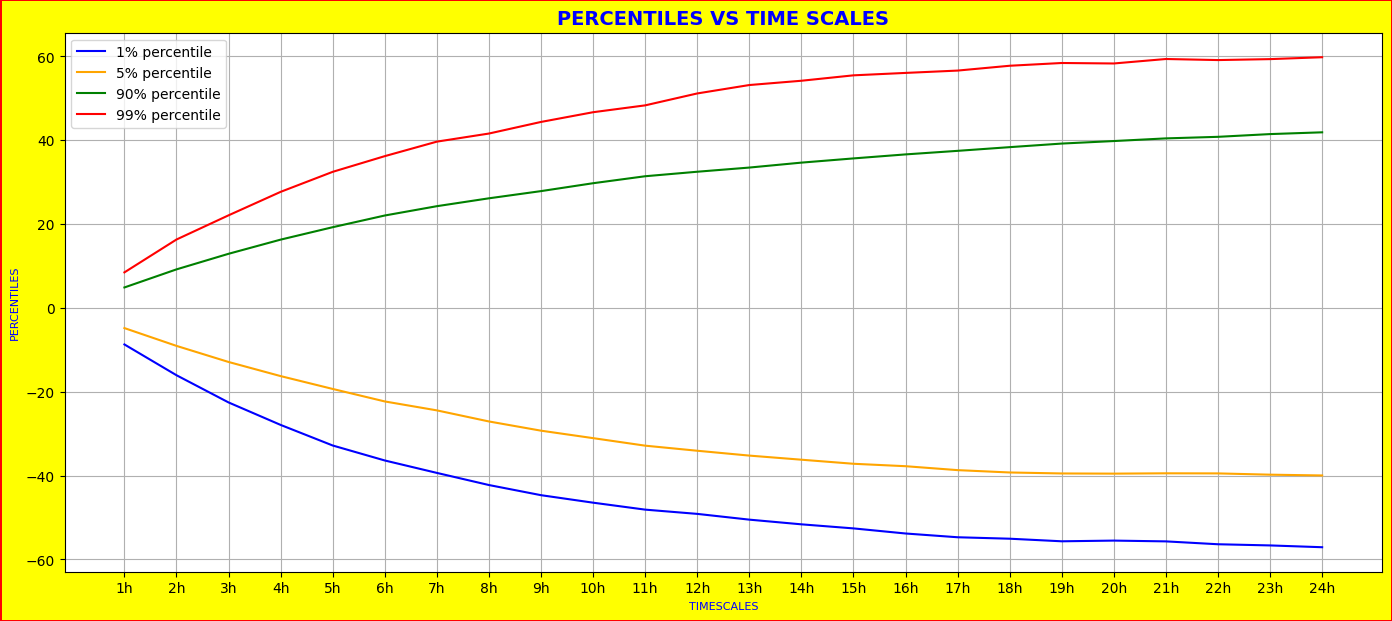

In [126]:
# PERCENTILES GRAPHS FOR THE RANGE OF TIMESCALES SHIFT
plt.figure(figsize=(17, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.title("PERCENTILES VS TIME SCALES",
          color="blue", fontsize=14, fontweight="bold")
plt.xlabel("TIMESCALES", color="blue", fontsize=8)
plt.ylabel("PERCENTILES", color="blue", fontsize=8)

# PLOTTING THE PERCENTILES VS TIME SCALES SHIFT 
plt.plot(percTransposed.index, percTransposed[0.01], color="blue", label="1% percentile")
plt.plot(percTransposed.index, percTransposed[0.05], color="orange", label="5% percentile")
plt.plot(percTransposed.index, percTransposed[0.95], color="green", label="90% percentile")
plt.plot(percTransposed.index, percTransposed[0.99], color="red", label="99% percentile")

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 5

In [127]:
# AUTOCORRELATION CALCULATION USING THE WIND GENERATION DATA AND 240 LAGS FOR 10 DAYS
autoCorr = sm.tsa.acf(windNum['Wind Generation'], nlags=240)
autoCorr[0:5]

array([1.        , 0.99194147, 0.97259602, 0.94626139, 0.91599461])

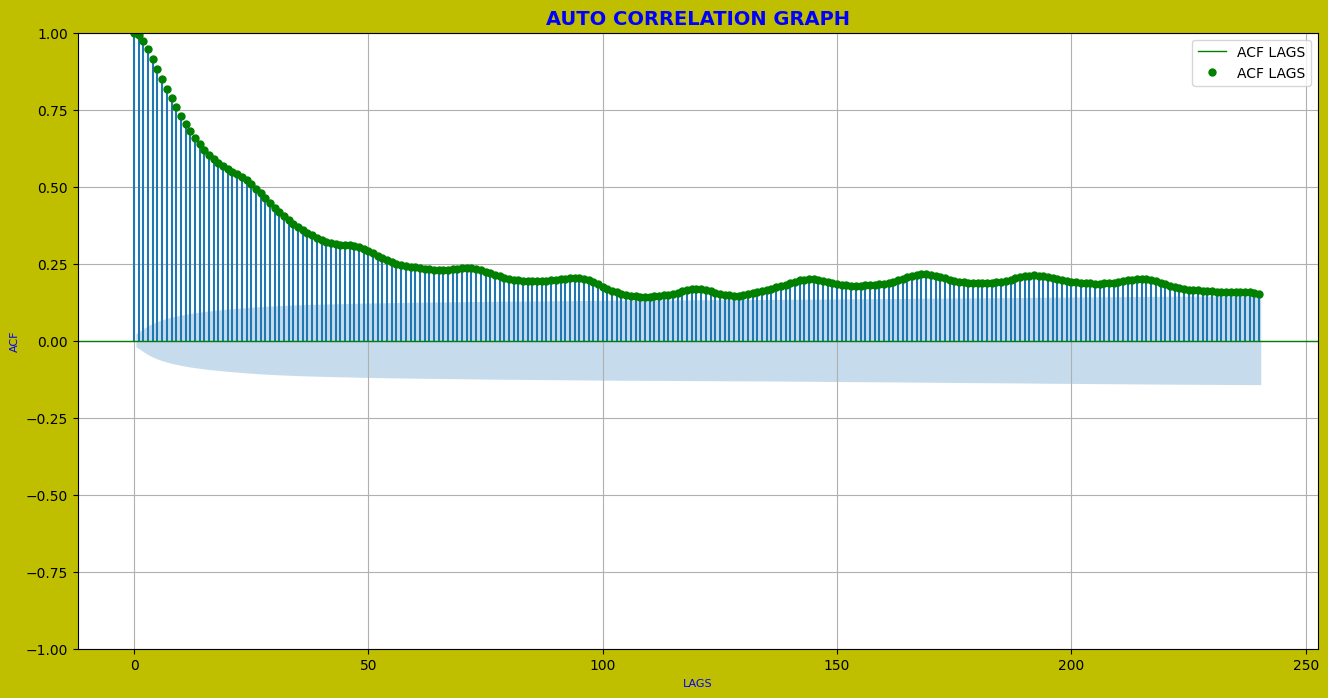

In [128]:
# PLOTTING THE AUTOCORRELATION GRAPH FOR THE WIND GENERATION DATA
plot_acf(windNum["Wind Generation"], lags=240,
         label="ACF LAGS", color="green", linewidth=1)

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.title("AUTO CORRELATION GRAPH", color="blue",
          fontsize=14, fontweight="bold")
plt.xlabel("LAGS", color="blue", fontsize = 8)
plt.ylabel("ACF", color="blue", fontsize = 8)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right", frameon=True)
plt.grid()
plt.show()

#### QUESTION 6

In [129]:
# AUTO CORRELATION WITH CHANGE IN WIND GENERATION
autoCorrChange = sm.tsa.acf(windNum['Change in Wind Generation'], nlags=240)
autoCorrChange[0:5]

array([1.        , 0.7040218 , 0.436171  , 0.24613952, 0.12641388])

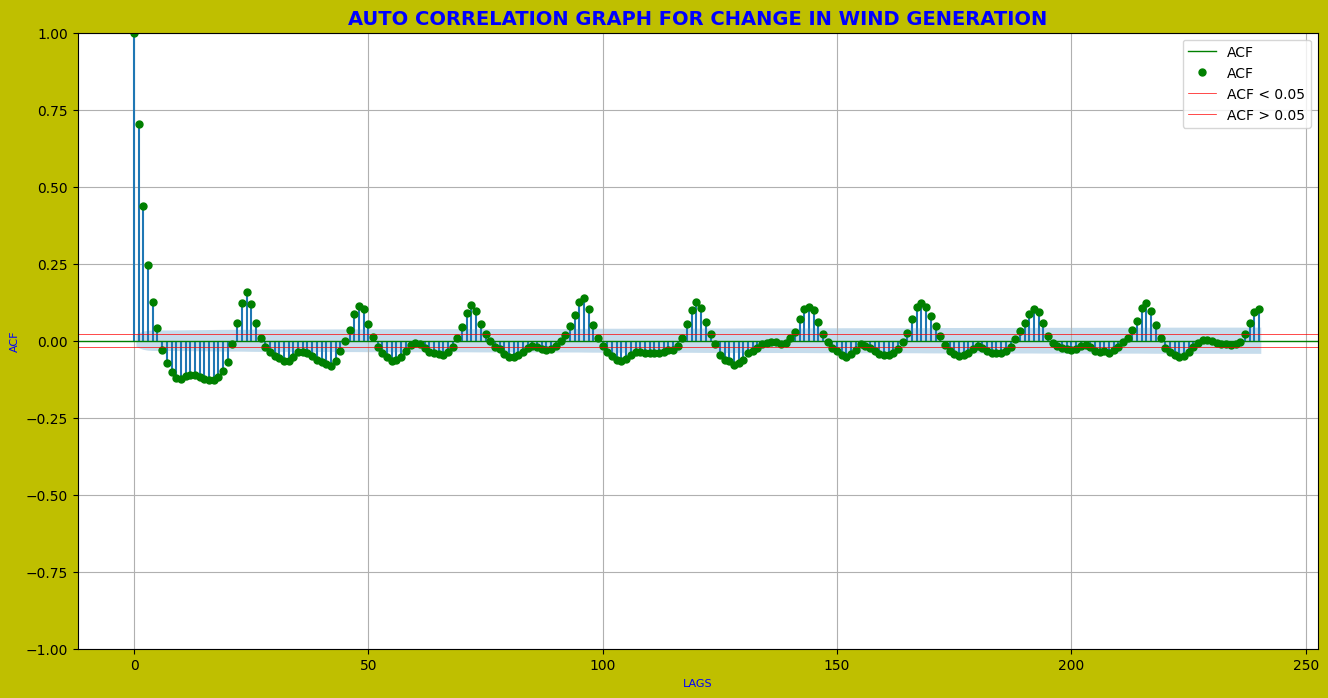

In [130]:
# ACF FOR CHANGE IN WIND GENERATION
plot_acf(windNum["Change in Wind Generation"], lags=240,
         label="ACF", color="green", linewidth=1)

# HORIZONTAL BOUNDARIES FOR DETECTING STATISTICAL SIGNIFICANCE VALUES FOR THE ACF(p<0.05)
bound1 = +1.96/(np.sqrt(len(windNum)))
bound2 = -1.96/(np.sqrt(len(windNum)))

# PLOT LINES FOR THE BOUNDARIES FOR DETECTING STATISTICAL SIGNIFICANCE VALUES FOR THE ACF(p<0.05)
plt.axhline(bound1, color='r', label='ACF < 0.05', linewidth=.5)
plt.axhline(bound2, color='r', label='ACF > 0.05', linewidth=.5)

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'
plt.title('AUTO CORRELATION GRAPH FOR CHANGE IN WIND GENERATION',
          color="blue", fontsize=14, fontweight="bold")
plt.xlabel('LAGS', color="blue", fontsize = 8)
plt.ylabel('ACF', color="blue", fontsize = 8)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### QUESTION 7

In [131]:
# VARIANCE RATIO FOR WIND GENERATION
vRatio = VarianceRatio(windNum['Wind Generation'], lags=240)
vRatio.summary()

Test Statistic,-2.558
P-value,0.011
Lags,240


In [132]:
# ADF TEST - TO TEST IF THE WIND GENERATION DATA IS STATIONARY OR NOT
# TO TEST THE HYPOTHESIS THAT THE WIND GENERATION DATA IS A RANDOM WALK
F = ADF(windNum['Wind Generation'])
F.summary()

Test Statistic,-9.498
P-value,0.000
Lags,26


#### QUESTION 8

In [133]:
# SIMPLE MOVING AVERAGE (SMA) FOR WIND GENERATION CALCULATION
simpleMAV = []

arr = windPower["Wind Generation"]
windowSize = np.arange(1, 25, 1)

# MAKING A SERIES OF WIND GENERATION
pdSeries = pd.Series(arr)
index = 0

# LOOP FOR CALCULATING SIMPLE MOVING AVERAGE FOR EACH OF THE 24 WINDOW SIZES
while index < len(windowSize):
    # CALCULATING MOVING AVERAGES FOR EACH WINDOW SIZE
    winSize = pdSeries.rolling(windowSize[index])
    # CALCULATING MEAN OF MOVING AVERAGES
    movAvgs = winSize.mean()  
    # APPENDING TO LIST OF EVENTS FOR EACH WINDOW SIZE
    simpleMAV.append(movAvgs)
    index += 1

# SHOWING THE FIRST 6 ROWS OF THE SMA
simpleMAV[0:6]

[Date
 2014-01-01 01:00:00    1190.1
 2014-01-01 02:00:00    1186.6
 2014-01-01 03:00:00    1174.3
 2014-01-01 04:00:00    1146.7
 2014-01-01 05:00:00    1156.8
                         ...  
 2014-12-31 20:00:00     996.8
 2014-12-31 21:00:00    1031.8
 2014-12-31 22:00:00    1218.0
 2014-12-31 23:00:00    1312.1
 2015-01-01 00:00:00    1424.8
 Name: Wind Generation, Length: 8760, dtype: float64,
 Date
 2014-01-01 01:00:00        NaN
 2014-01-01 02:00:00    1188.35
 2014-01-01 03:00:00    1180.45
 2014-01-01 04:00:00    1160.50
 2014-01-01 05:00:00    1151.75
                         ...   
 2014-12-31 20:00:00    1011.90
 2014-12-31 21:00:00    1014.30
 2014-12-31 22:00:00    1124.90
 2014-12-31 23:00:00    1265.05
 2015-01-01 00:00:00    1368.45
 Name: Wind Generation, Length: 8760, dtype: float64,
 Date
 2014-01-01 01:00:00            NaN
 2014-01-01 02:00:00            NaN
 2014-01-01 03:00:00    1183.666667
 2014-01-01 04:00:00    1169.200000
 2014-01-01 05:00:00    1159.266667
 

In [134]:
# DATAFRAME OF SMA FOR WIND GENERATION
simpleMAV = pd.DataFrame(simpleMAV)

# FILLING NaN VALUES WITH 0
simpleMAV.fillna(0, inplace=True)

# TRANSPOSE OF DATAFRAME OF SMA FOR WIND GENERATION
simpleMAVTransposed = simpleMAV.transpose()
simpleMAVTransposed.head(2)


,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,...,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,1190.1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,1186.6,1188.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# COLUMNS OF DATAFRAME OF SMA FOR WIND GENERATION
windows=['Window 1','Window 2','Window 3','Window 4','Window 5','Window 6','Window 7','Window 8','Window 9','Window 10','Window 11','Window 12','Window 13','Window 14','Window 15','Window 16','Window 17','Window 18','Window 19','Window 20','Window 21','Window 22','Window 23','Window 24']

# ADDING COLUMNS TO DATAFRAME OF SMA
simpleMAVTransposed.columns = windows
simpleMAVTransposed.head(2)

,Window 1,Window 2,Window 3,Window 4,Window 5,Window 6,Window 7,Window 8,Window 9,Window 10,...,Window 15,Window 16,Window 17,Window 18,Window 19,Window 20,Window 21,Window 22,Window 23,Window 24
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,1190.1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,1186.6,1188.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
# MEAN ABSOLUTE ERROR FOR SMA FOR WIND GENERATION
MAErrors = []

# FOR LOOP FOR CALCULATING MAE FOR EACH WINDOW SIZE
for i in windowSize:
    MAErr = mae(windPower["Wind Generation"], (simpleMAVTransposed).iloc[:, i-1])
    MAErrors.append(MAErr)
    
# DATAFRAME OF MAE FOR SMA FOR WIND GENERATION
maeErrs = pd.DataFrame(MAErrors)

# ADDING COLUMNS TO DATAFRAME OF MAE FOR SMA FOR WIND GENERATION
maeErrs.columns = ["MAE"]
maeErrs.set_index([windowSize], inplace=True)
maeErrs

,MAE
1,0.000000
2,33.382471
3,62.862934
4,89.390713
5,113.502877
6,135.513893
7,155.782852
8,174.581157
9,191.861547
10,207.697341


#### QUESTION 9

In [137]:
# LISTS TO STORE PERSISTENCE VALUES AND WINDOW SIZES
persistence = []
index = 1
 
# CALCULATING PERSISTENCE FOR EACH WINDOW SIZE
for index in windowSize:
    arr = windPower["Wind Generation"].shift(index)
    persistence.append(arr)
    
# PERSISTENCE DATAFRAME 
persist = pd.DataFrame(persistence).transpose()
persist.fillna(0, inplace=True)
persist.head(4)

,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,...,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 03:00:00,1186.6,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 04:00:00,1174.3,1186.6,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
# MEAN ABSOLUTE ERRORS FOR PERSISTENCE MODEL FOR WIND GENERATION
persistMaeErr = []

# CALCULATING MAE FOR EACH WINDOW SIZE FOR PERSISTENCE
for i in windowSize:
    err = mae(windPower["Wind Generation"], (persist).iloc[:, i-1])
    persistMaeErr.append(err)
    
print(persistMaeErr)

[66.62908675799086, 124.43453196347032, 175.14756849315071, 219.9664497716895, 260.05316210045663, 296.1855365296804, 328.33710045662104, 357.1499429223744, 382.9671461187214, 406.09070776255714, 426.5038356164383, 444.8217351598174, 461.0433447488585, 475.89309360730596, 489.6733219178082, 501.832397260274, 512.2439155251142, 521.2381506849315, 528.7853881278539, 535.1028310502282, 540.6013470319634, 545.7994520547945, 551.8389269406392, 559.1393835616439]


In [139]:
# PERCENTAGE OF MEAN ABSOLUTE ERROR FOR PERSISTENCE - BENCHMARK MODEL
percentMAE = []
persErrLen = len(persistMaeErr)

# FOR LOOP FOR CALCULATING MAE AS PERCENTAGE
for i in np.arange(0, persErrLen, 1):
    percents = (persistMaeErr[i]/max(persistMaeErr))*100
    percentMAE.append(percents)
    
print(percentMAE)

[11.916364455240553, 22.254653423058635, 31.32449146713363, 39.340181757638376, 46.50954122457846, 52.97168205949253, 58.72186973579954, 63.874939491361985, 68.4922503006802, 72.62781333266369, 76.27862535807536, 79.5547135897246, 82.45588815655829, 85.11171053198399, 87.57625313363798, 89.7508585540278, 91.6129198880945, 93.22150540795633, 94.57130076575201, 95.70115194563725, 96.68454108676882, 97.61420284475835, 98.69434047473071, 100.0]


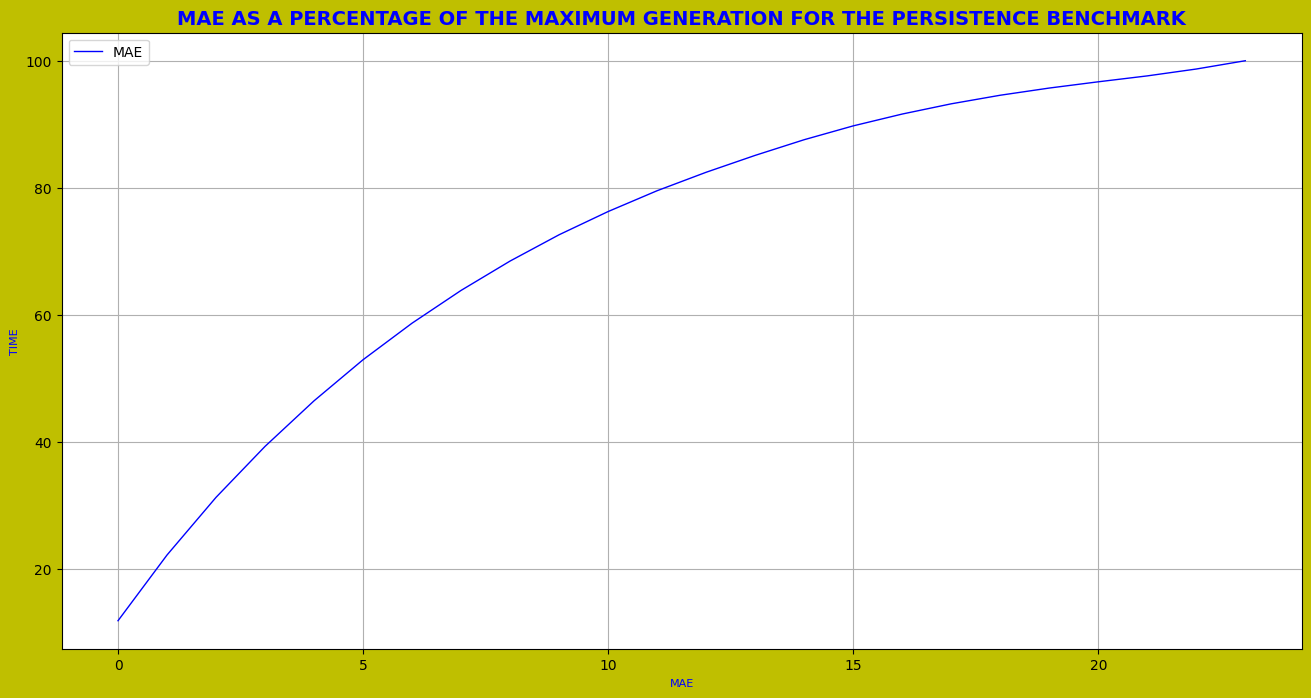

In [140]:
# MAE AS A PERCENTAGE OF THE MAXIMUM GENERATION FOR THE PERSISTENCE BENCHMARK
plt.title('MAE AS A PERCENTAGE OF THE MAXIMUM GENERATION FOR THE PERSISTENCE BENCHMARK',
          color="blue", fontsize=14, fontweight="bold")
plt.xlabel('MAE', color="blue", fontsize = 8)
plt.ylabel('TIME', color="blue", fontsize = 8)

# PLOTTING THE GRAPH OF MAE AS A PERCENTAGE OF THE MAXIMUM GENERATION FOR THE PERSISTENCE BENCHMARK
plt.plot(percentMAE, color="blue", linewidth=1, label="MAE")

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 10

In [141]:
# PARAMETERS FOR ARIMA MODEL, ARIMA TEST DIFFERENT COMBINATIONS OF PARAMETERS WITH P AND Q RANGING FROM 1 TO 4
p = np.arange(1, 5, 1)  # ARIMA MODEL p PARAMETERS
q = np.arange(1, 5, 1)  # ARIMA MODEL q PARAMETERS
series = windPower['Wind Generation']  # WIND GENERATION DATA

difference = 1  # ARIMA MODEL d PARAMETER: DIFFERENCE ORDER FOR ARIMA MODEL

# CREATE AN EMPTY DATAFRAME TO STORE THE RESULTS
optAICBIC = pd.DataFrame(
    columns=['P Parameter', 'Q Parameter', 'AIC Criterion', 'BIC Criterion'])

# FOR LOOP FOR CALCULATING AIC AND BIC FOR EACH COMBINATION OF p AND q PARAMETERS
# ARIMA MODEL IS FITTED WITH DIFFERENT COMBINATIONS OF "a" VALUES IN THE ORDER PARAMETERS.
for parP in p:

    # ARIMA MODEL IS FITTED WITH DIFFERENT COMBINATIONS OF "b" VALUES IN THE ORDER PARAMETERS.
    for paramQ in q:
        # CREATING THE ARIMA MODEL WITH THE PARAMETERS AND THE DIFFERENCE ORDER
        modelARIMA = ARIMA(series, order=(parP, difference, paramQ))

        # FITTING THE ARIMA MODEL
        output = modelARIMA.fit()

        # ADDING THE RESULTS TO THE DATAFRAME
        optAICBIC = optAICBIC.append({'P Parameter': parP,
                                        'Q Parameter': paramQ,
                                        'AIC Criterion': output.aic,
                                        'BIC Criterion': output.bic}, ignore_index=True)

# DISPLAYING THE RESULTS DATAFRAME IN A TABLE FORMAT
print(optAICBIC.to_string(index=False))

# DEFINING THE OPTIMAL PARAMETERS FOR THE ARIMA MODEL
optimalParams = optAICBIC.loc[optAICBIC['AIC Criterion'].idxmin()]
print("\nTHE OPTIMAL PARAMETERS ARE\n")
print(optimalParams)

 P Parameter  Q Parameter  AIC Criterion  BIC Criterion
         1.0          1.0   98978.479903   98999.713414
         1.0          2.0   98964.857960   98993.169308
         1.0          3.0   98966.576021   99001.965206
         1.0          4.0   98966.154330   99008.621352
         2.0          1.0   98854.032745   98882.344093
         2.0          2.0   98784.948487   98820.337672
         2.0          3.0   98968.839175   99011.306197
         2.0          4.0   98812.833183   98862.378042
         3.0          1.0   98782.501139   98817.890324
         3.0          2.0   98784.926424   98827.393446
         3.0          3.0   98788.930764   98838.475623
         3.0          4.0   98787.230446   98843.853142
         4.0          1.0   98966.168754   99008.635776
         4.0          2.0   98786.617048   98836.161907
         4.0          3.0   98952.987202   99009.609898
         4.0          4.0   98981.306584   99045.007117

THE OPTIMAL PARAMETERS ARE

P Parameter        